# Explaining Models with Shap
- Amber Kutscher

# Load Your Saved Joblib File

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import joblib
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForestRegressor'])

In [2]:
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
rf_reg = loaded_joblib['RandomForestRegressor']
lin_reg = loaded_joblib['LinearRegression']

# Explain your tree-based model with shap:

In [3]:
import shap
shap.initjs()

## Create a model explainer.

In [4]:
# Create a SHAP explainer using the model
explainer = shap.Explainer(rf_reg) # RandomForestRegressor
explainer

## Create an X_shap and y_shap variable from your training data (use shap.sample as needed).

In [5]:
len(X_train_df)

6818

In [6]:
# Create an X_shap variable
X_shap = shap.sample(X_train_df, nsamples=2000, random_state=321)
X_shap.head()

,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
454,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,10.300000,0.011117,85.8540
5240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,20.500000,0.032762,40.0822
7547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,7.270000,0.046654,98.6384
4349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.835253,0.088840,254.2672
4566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.270000,0.046521,97.7384


In [7]:
# Get the corresponding y_shap variables
y_shap = y_train.loc[X_shap.index]
y_shap

454      2683.1740
5240     1257.0304
7547     1970.7680
4349    10993.6896
4566      591.2304
           ...    
6823     2773.0570
4210     1962.7784
2636     2673.8528
5635     3661.9000
1619      419.4540
Name: Item_Outlet_Sales, Length: 2000, dtype: float64

## Calculate the shap values for your model.

In [8]:
# Get SHAP values from explainer for training data
shap_values = explainer(X_shap, y_shap)
type(shap_values)

shap._explanation.Explanation

In [9]:
X_shap.shape

(2000, 31)

In [10]:
shap_values.shape

(2000, 31)

## Create a summary plot - with plot_type='bar'

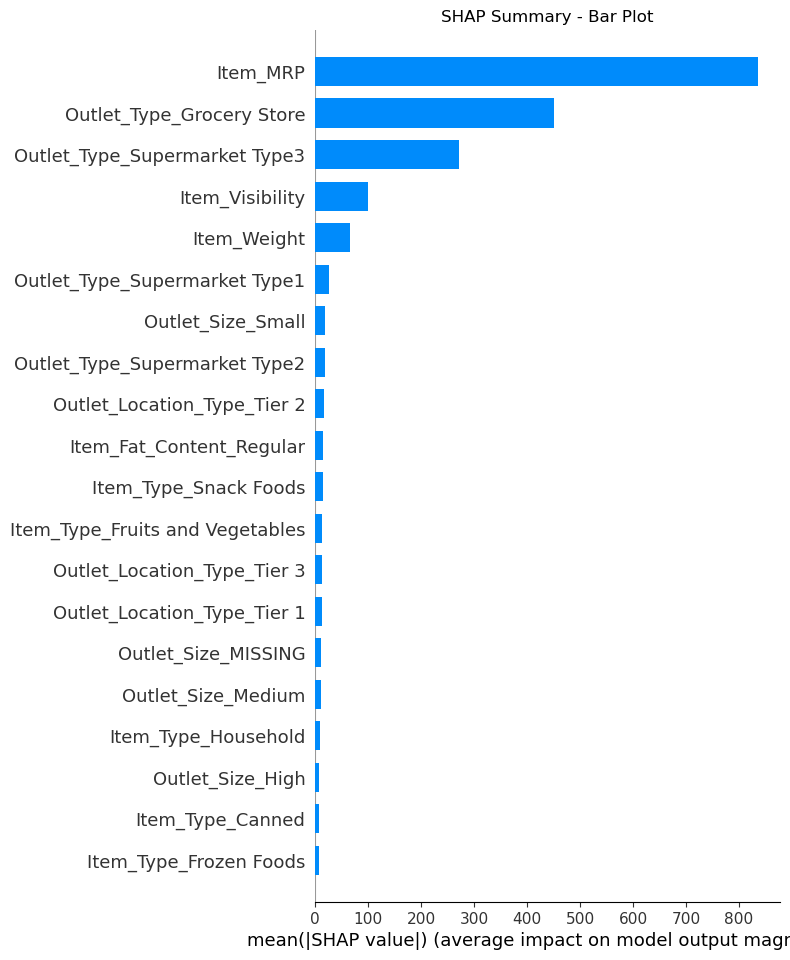

In [11]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, features=X_shap, plot_type='bar', show=False)
ax.set_title('SHAP Summary - Bar Plot');
fig.savefig('Images/shap_bar_plot.png')

![RandomForest](Images/randomforest_coeffs.png)

### Compare the most important features according to SHAP vs. your original feature importances. Are they the same features in both? If not, what's different?

- The most important features according to SHAP are:
    - Item_MRP
    - Outlet_Type_Grocery Store
    - Outlet_Type_Supermarket Type3
    - Item_Visibility
    - Item_Weight

- In comparison, the 5 most important features from our original model are:
    - Item_MRP
    - Outlet_Type_Grocery Store
    - Item_Visibility
    - Outlet_Type_Supermarket Type3
    - Item_Weight

As can be seen, the most important features according to both models are the same, however the order is a bit different.

## Create a second summary plot - with plot_type='dot'

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


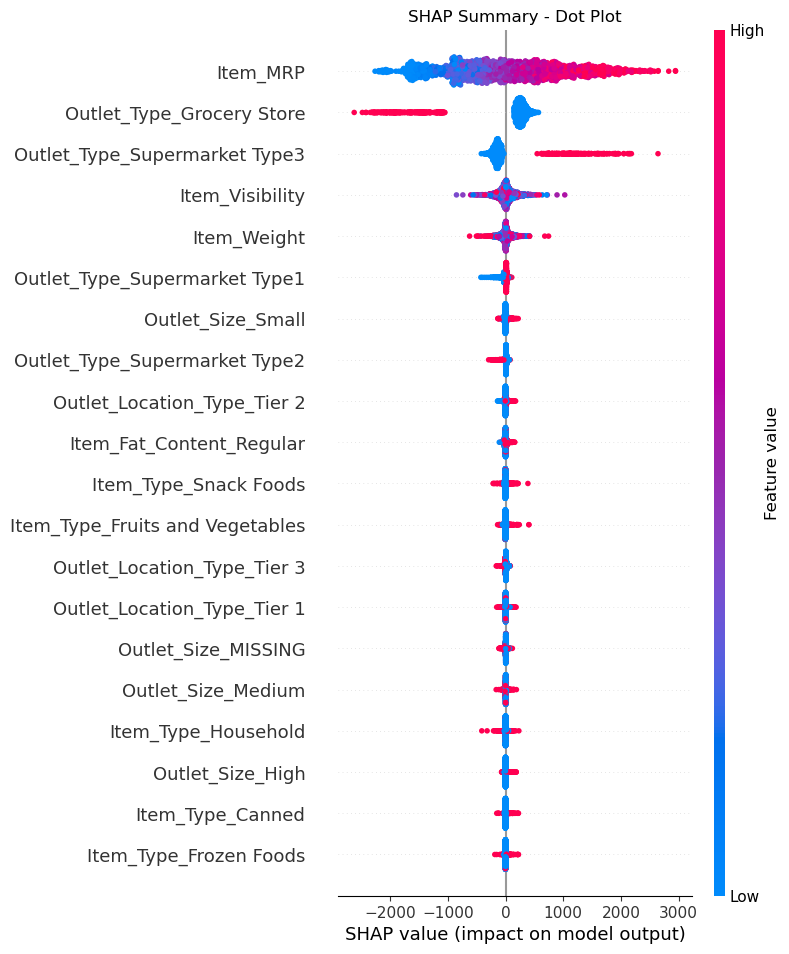

In [12]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, features=X_shap, plot_type='dot', show=False)
ax.set_title('SHAP Summary - Dot Plot');
fig.savefig('Images/shap_dot_plot.png')

### Interpret the top 3 most important features and how they influence your model's predictions.

As per the SHAP ummary - Dot Plot, the 3 most important features are:
1. "Item_MRP"
    - When the listed price (Item MRP) of a product increases, the model predicts higher overall item outlet sales. This implies that as the price of a product goes up, the model anticipates an increase in the number of units sold for that product.
2. "Outlet_Type_Grocery Store"
    - Products sold in grocery stores have a smaller impact on item outlet sales compared to those sold in supermarkets. In other words, the type of outlet significantly influences the model's predictions, and grocery stores tend to have a lower effect on sales.
3. "Outlet_Type_Supermarket Type3"
    - Among the three types of supermarkets, Supermarket Type3 has the most substantial financial impact on item outlet sales, according to the model. This suggests that Supermarket Type3 stores may be the largest among the three and have the highest influence on the predicted sales of products.

# Local Explanations

In [13]:
# arbitrarily choosing a row to use
i = 15
single_row_X = X_shap.iloc[i]
single_row_y = y_shap.iloc[i]
single_shap_vals = shap_values[i]
single_row_X.head(10)

Item_Fat_Content_Regular           1.0
Item_Type_Baking Goods             0.0
Item_Type_Breads                   0.0
Item_Type_Breakfast                0.0
Item_Type_Canned                   0.0
Item_Type_Dairy                    0.0
Item_Type_Frozen Foods             0.0
Item_Type_Fruits and Vegetables    1.0
Item_Type_Hard Drinks              0.0
Item_Type_Health and Hygiene       0.0
Name: 425, dtype: float64

In [14]:
# true class of selected row
single_row_y

5642.655

In [15]:
single_row_X

Item_Fat_Content_Regular             1.000000
Item_Type_Baking Goods               0.000000
Item_Type_Breads                     0.000000
Item_Type_Breakfast                  0.000000
Item_Type_Canned                     0.000000
Item_Type_Dairy                      0.000000
Item_Type_Frozen Foods               0.000000
Item_Type_Fruits and Vegetables      1.000000
Item_Type_Hard Drinks                0.000000
Item_Type_Health and Hygiene         0.000000
Item_Type_Household                  0.000000
Item_Type_Meat                       0.000000
Item_Type_Others                     0.000000
Item_Type_Seafood                    0.000000
Item_Type_Snack Foods                0.000000
Item_Type_Soft Drinks                0.000000
Item_Type_Starchy Foods              0.000000
Outlet_Size_High                     0.000000
Outlet_Size_MISSING                  0.000000
Outlet_Size_Medium                   1.000000
Outlet_Size_Small                    0.000000
Outlet_Location_Type_Tier 1       

## Item_MRP

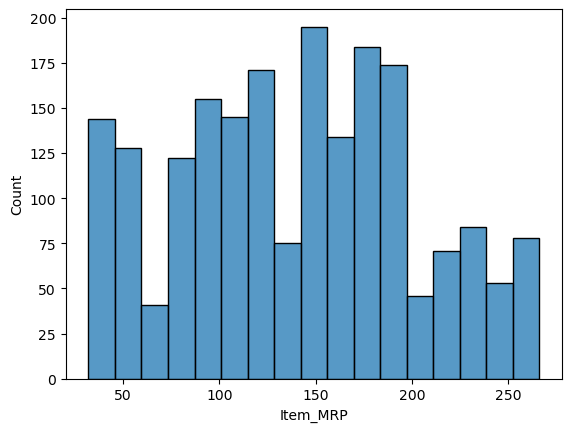

In [16]:
sns.histplot(X_shap['Item_MRP']);

- According to the data dictionary, "Item_MRP":
    - Maximum Retail Price (list price) of the product.

In [17]:
X_shap['Item_MRP'].agg(['mean', 'median'])

mean      140.033302
median    143.215400
Name: Item_MRP, dtype: float64

In [18]:
# Finding number of products with an MRP above 140
filt_item_mrp_high = X_shap['Item_MRP'] > 140
len(X_shap[filt_item_mrp_high])

1043

## Outlet_Location_Type_Tier 1 

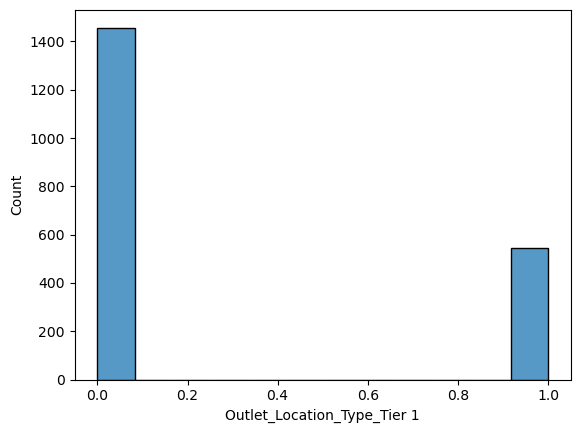

In [19]:
sns.histplot(X_shap['Outlet_Location_Type_Tier 1']);

- According to the data dictionary, "Outlet_Location_Type_Tier 1":
    - The type pf area in which the store is located.

In [20]:
X_shap['Outlet_Location_Type_Tier 1'].agg(['mean', 'median'])

mean      0.2715
median    0.0000
Name: Outlet_Location_Type_Tier 1, dtype: float64

In [21]:
# Finding number of Tier 1 outlets == 1
filt_loc_tier1 = X_shap['Outlet_Location_Type_Tier 1'] == 1
len(X_shap[filt_loc_tier1])

543

## Outlet_Size_High 

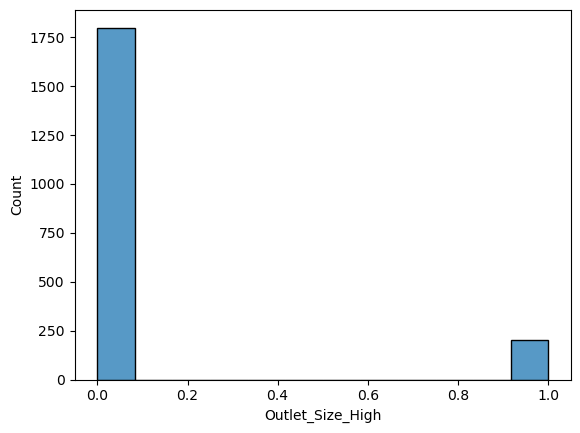

In [22]:
sns.histplot(X_shap['Outlet_Size_High']);

- According to the data dictionary, "Outlet_Location_Type_Tier 1":
    - The type pf area in which the store is located.

In [23]:
X_shap['Outlet_Size_High'].agg(['mean', 'median'])

mean      0.1005
median    0.0000
Name: Outlet_Size_High, dtype: float64

In [24]:
# Finding number of high sized outlets == 1
filt_size_high = X_shap['Outlet_Size_High'] == 1
len(X_shap[filt_size_high])

201